<a href="https://colab.research.google.com/github/Anderson991288/ECG-Signal-Processing/blob/main/MIT_BIH0619.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import wfdb
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
if os.path.isdir("mitdb"):
    print('You already have the data.')
else:
    wfdb.dl_database('mitdb', 'mitdb')

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

In [ ]:
record = wfdb.rdsamp('mitdb/103', sampto=3000)
annotation = wfdb.rdann('mitdb/103', 'atr', sampto=3000)

In [ ]:
record[1]

{'fs': 360,
 'sig_len': 3000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V2'],
 'comments': ['-1 M 742 654 x1', 'Diapres, Xyloprim']}

Text(0, 0.5, 'Lead II')

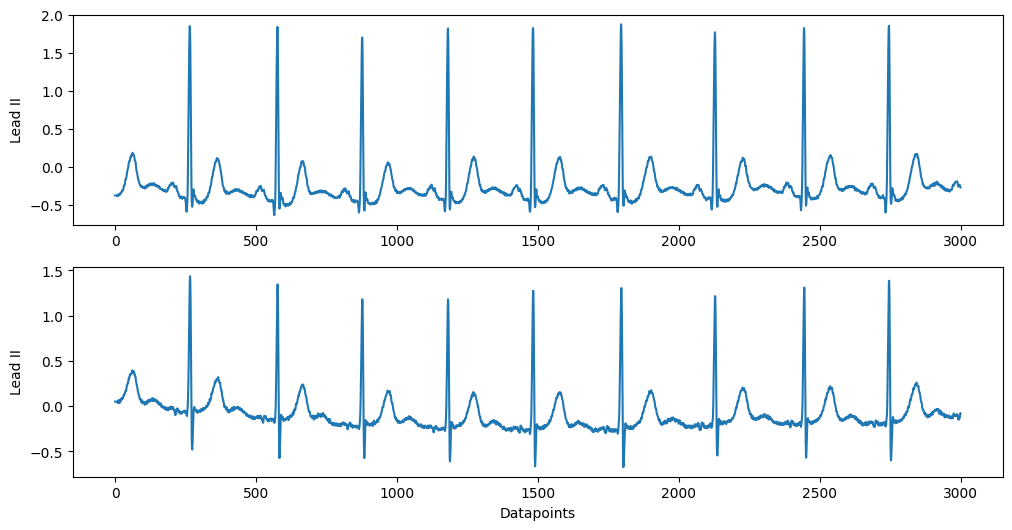

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(12,6))
I = record[0][:, 0]
II = record[0][:, 1]

ax[0].plot(I)
ax[1].plot(II)
ax[0].set_ylabel('Lead II')
ax[1].set_xlabel('Datapoints')
ax[1].set_ylabel('Lead II')

In [ ]:
pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


正在讀取 100 號心電數據...
正在讀取 101 號心電數據...
正在讀取 103 號心電數據...
正在讀取 105 號心電數據...
正在讀取 106 號心電數據...
正在讀取 107 號心電數據...
正在讀取 108 號心電數據...
正在讀取 109 號心電數據...
正在讀取 111 號心電數據...
正在讀取 112 號心電數據...
正在讀取 113 號心電數據...
正在讀取 114 號心電數據...
正在讀取 115 號心電數據...
正在讀取 116 號心電數據...
正在讀取 117 號心電數據...
正在讀取 119 號心電數據...
正在讀取 121 號心電數據...
正在讀取 122 號心電數據...
正在讀取 123 號心電數據...
正在讀取 124 號心電數據...
正在讀取 200 號心電數據...
正在讀取 201 號心電數據...
正在讀取 202 號心電數據...
正在讀取 203 號心電數據...
正在讀取 205 號心電數據...
正在讀取 208 號心電數據...
正在讀取 210 號心電數據...
正在讀取 212 號心電數據...
正在讀取 213 號心電數據...
正在讀取 214 號心電數據...
正在讀取 215 號心電數據...
正在讀取 217 號心電數據...
正在讀取 219 號心電數據...
正在讀取 220 號心電數據...
正在讀取 221 號心電數據...
正在讀取 222 號心電數據...
正在讀取 223 號心電數據...
正在讀取 228 號心電數據...
正在讀取 230 號心電數據...
正在讀取 231 號心電數據...
正在讀取 232 號心電數據...
正在讀取 233 號心電數據...
正在讀取 234 號心電數據...
使用SMOTE前的類別分布：
{'100': 1, '101': 1, '103': 1, '105': 1, '106': 1, '107': 1, '108': 1, '109': 1, '111': 1, '112': 1, '113': 1, '114': 1, '115': 1, '116': 1, '117': 1, '119': 1, '121': 1, '122': 1, '123': 1, '124': 1, '200': 1, 

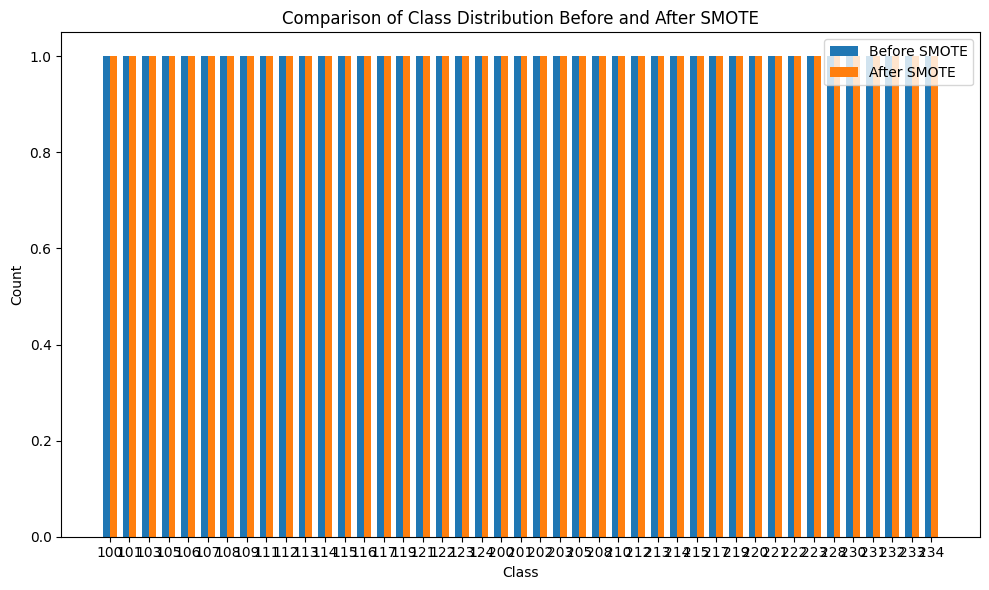

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

def main():
    # Load and preprocess data
    X_data, y_data = loadData()
    X_data = np.array(X_data)
    y_data = np.array(y_data)

    # Calculate class distribution before SMOTE
    unique, counts_before = np.unique(y_data, return_counts=True)
    counts_before_dict = dict(zip(unique, counts_before))
    print("使用SMOTE前的類別分布：")
    print(counts_before_dict)

    # Apply SMOTE to balance the data
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X_data, y_data)

    # Calculate class distribution after SMOTE
    unique, counts_after = np.unique(y_resampled, return_counts=True)
    class_distribution_after = dict(zip(unique, counts_after))
    print("使用SMOTE後的類別分布：")
    print(class_distribution_after)

    # Plot the comparison between class distributions before and after SMOTE
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(unique))
    bar_width = 0.35

    # Plot bars for class distribution before SMOTE
    rects1 = ax.bar(index, counts_before, bar_width, label='Before SMOTE')

    # Plot bars for class distribution after SMOTE
    rects2 = ax.bar(index + bar_width, counts_after, bar_width, label='After SMOTE')

    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title('Comparison of Class Distribution Before and After SMOTE')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(unique)
    ax.legend()

    plt.tight_layout()
    plt.show()


def loadData():
    numberSet = ['100', '101', '103', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115',
                 '116', '117', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '208',
                 '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230',
                 '231', '232', '233', '234']
    X_data = []
    y_data = []
    for n in numberSet:
        getDataSet(n, X_data, y_data)
    return X_data, y_data


def getDataSet(number, X_data, y_data):
    # Load data
    print("正在讀取 " + number + " 號心電數據...")
    record = wfdb.rdrecord('mitdb/' + number, channel_names=['MLII'])

    data = record.p_signal.flatten()

    # 小波去雜訊
    coeffs = pywt.wavedec(data, 'db4', level=9)
    coeffs[1:] = (pywt.threshold(c, value=0.1, mode='soft') for c in coeffs[1:])
    data = pywt.waverec(coeffs, 'db4')

    X_data.append(data)
    y_data.append(number)

    return


if __name__ == '__main__':
    main()
